In [2]:
using Gen

In [3]:
a = 1 + 1

2

In [4]:
a = 1 + 1;

In [5]:
using PyPlot

In [6]:
typeof(:foo)

Symbol

In [7]:
typeof("foo")

String

In [8]:
@gen function line_model(xs::Vector{Float64})
    n = length(xs)
    
    # We begin by sampling a slope and intercept for the line.
    # Before we have seen the data, we don't know the values of
    # these parameters, so we treat them as random choices. The
    # distributions they are drawn from represent our prior beliefs
    # about the parameters: in this case, that neither the slope nor the
    # intercept will be more than a couple points away from 0.
    slope = @trace(normal(0, 1), :slope)
    intercept = @trace(normal(0, 2), :intercept)
    
    # Given the slope and intercept, we can sample y coordinates
    # for each of the x coordinates in our input vector.
    for (i, x) in enumerate(xs)
        @trace(normal(slope * x + intercept, 0.1), (:y, i))
    end
    
    # The return value of the model is often not particularly important,
    # Here, we simply return n, the number of points.
    return n
end;

In [9]:
xs = [-5., -4., -3., -.2, -1., 0., 1., 2., 3., 4., 5.];

In [10]:
xs

11-element Array{Float64,1}:
 -5.0
 -4.0
 -3.0
 -0.2
 -1.0
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0

In [11]:
n = line_model(xs)
println(n)

11


In [12]:
trace = Gen.simulate(line_model, (xs,));

In [13]:
println(trace)

Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}(DynamicDSLFunction{Any}(Dict{Symbol,Any}(), Dict{Symbol,Any}(), Type[Array{Float64,1}], ##line_model#363, Bool[false], false), Trie{Any,Gen.ChoiceOrCallRecord}(Dict{Any,Gen.ChoiceOrCallRecord}((:y, 7)=>ChoiceOrCallRecord{Float64}(-1.63075, 1.23446, NaN, true),(:y, 9)=>ChoiceOrCallRecord{Float64}(-4.83336, 1.12029, NaN, true),(:y, 1)=>ChoiceOrCallRecord{Float64}(7.55754, 1.3697, NaN, true),(:y, 10)=>ChoiceOrCallRecord{Float64}(-6.33607, 1.31301, NaN, true),(:y, 5)=>ChoiceOrCallRecord{Float64}(1.27632, 0.737142, NaN, true),(:y, 4)=>ChoiceOrCallRecord{Float64}(0.38377, -1.12301, NaN, true),:intercept=>ChoiceOrCallRecord{Float64}(-0.147674, -1.61481, NaN, true),(:y, 3)=>ChoiceOrCallRecord{Float64}(4.36294, 0.858416, NaN, true),(:y, 6)=>ChoiceOrCallRecord{Float64}(-0.208778, 1.19696, NaN, true),(:y, 8)=>ChoiceOrCallRecord{Float64}(-3.14723, 1.09598, NaN, true),(:y, 11)=>ChoiceOrCallRecord{Float64}(-7.92112, 1.02299, NaN, true),(:y, 2)=>ChoiceOrCa

In [14]:
Gen.get_args(trace)

([-5.0, -4.0, -3.0, -0.2, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0],)

In [15]:
println(Gen.get_choices(trace))

│
├── (:y, 7) : -1.6307534390189442
│
├── (:y, 9) : -4.833355785566202
│
├── (:y, 1) : 7.557536167827763
│
├── (:y, 10) : -6.33607066516968
│
├── (:y, 5) : 1.27631725187685
│
├── (:y, 4) : 0.38377022856771426
│
├── :intercept : -0.1476743863451737
│
├── (:y, 3) : 4.362940196138226
│
├── (:y, 6) : -0.20877813744544285
│
├── (:y, 8) : -3.147228416758765
│
├── (:y, 11) : -7.921115327485703
│
├── (:y, 2) : 5.822831547666842
│
└── :slope : -1.5377021950925829



In [16]:
choices = Gen.get_choices(trace)
println(choices[:slope])

-1.5377021950925829


In [17]:
println(trace[:slope])

-1.5377021950925829


In [18]:
println(Gen.get_retval(trace));

11


In [19]:
function render_trace(trace; show_data=true)
    
    # Pull out xs from the trace
    xs = get_args(trace)[1]
    
    xmin = minimum(xs)
    xmax = maximum(xs)
    if show_data
        ys = [trace[(:y, i)] for i=1:length(xs)]
        
        # Plot the data set
        scatter(xs, ys, c="black")
    end
    
    # Pull out slope and intercept from the trace
    slope = trace[:slope]
    intercept = trace[:intercept]
    
    # Draw the line
    plot([xmin, xmax], slope *  [xmin, xmax] .+ intercept, color="black", alpha=0.5)
    ax = gca()
    ax[:set_xlim]((xmin, xmax))
    ax[:set_ylim]((xmin, xmax))
end;

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_trace#3(::Bool, ::Function, ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[19]:22
└ @ Main ./In[19]:22
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #render_trace#3(::Bool, ::Function, ::Gen.DynamicDSLTrace{DynamicDSLFunction{Any}}) at In[19]:23
└ @ Main ./In[19]:23


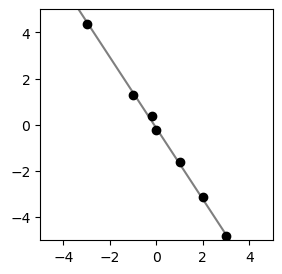

In [20]:
figure(figsize=(3,3))
render_trace(trace);

In [21]:
function grid(renderer::Function, traces; ncols=6, nrows=3)
    figure(figsize=(16, 8))
    for (i, trace) in enumerate(traces)
        subplot(nrows, ncols, i)
        renderer(trace)
    end
end;

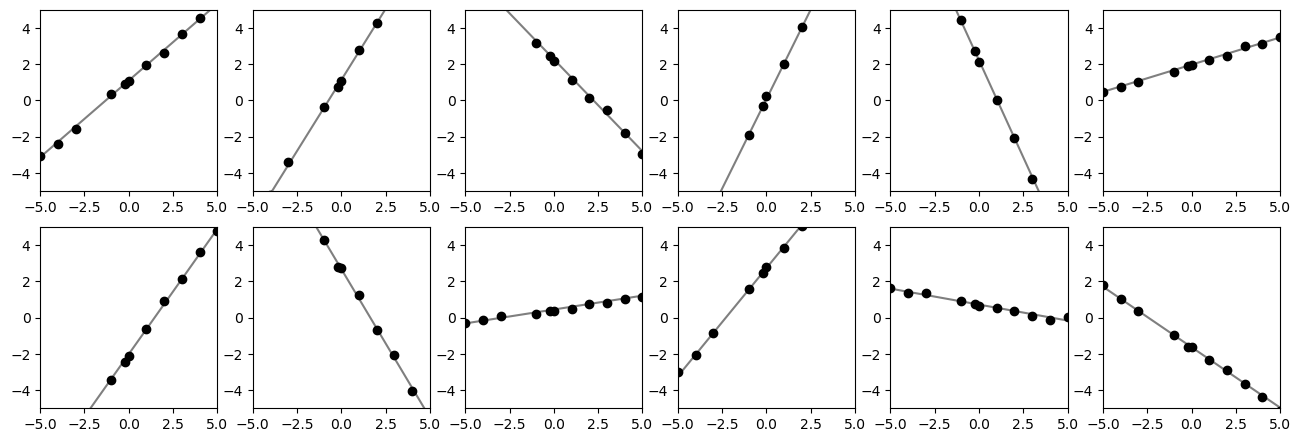

In [22]:
traces = [Gen.simulate(line_model, (xs,)) for _=1:12]
grid(render_trace, traces)